# Import Necessary Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, classification_report


# Load the dataset

In [2]:

file_path = "/kaggle/input/ipl-2025-mega-auction-dataset/ipl_2025_auction_players.csv"  # Replace with your dataset path
ipl_data = pd.read_csv(file_path)

print(ipl_data.head())


            Players Team  Type Base   Sold
0       Virat Kohli  RCB   BAT    -  21.00
1     Rajat Patidar  RCB   BAT    -  11.00
2        Yash Dayal  RCB  BOWL    -   5.00
3    Jasprit Bumrah   MI  BOWL    -  18.00
4  Suryakumar Yadav   MI   BAT    -  16.35


# Exploratory Data Analysis

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 623 entries, 0 to 622
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Players  623 non-null    object
 1   Team     623 non-null    object
 2   Type     623 non-null    object
 3   Base     623 non-null    object
 4   Sold     623 non-null    object
dtypes: object(5)
memory usage: 24.5+ KB
None
               Players Team  Type  Base Sold
count              623  623   623   623  623
unique             620   11     4     9   72
top     Daryl Mitchell    -  BOWL  0.30  TBA
freq                 2  395   216   322  293


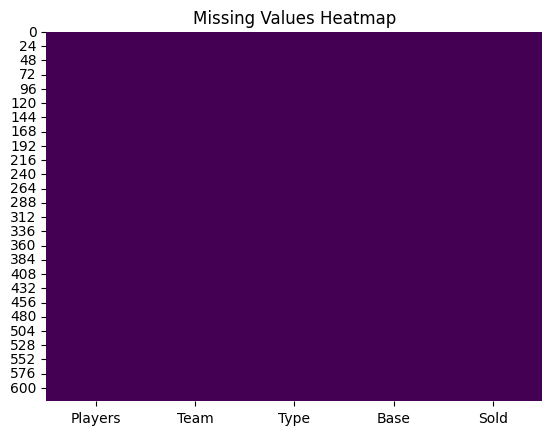

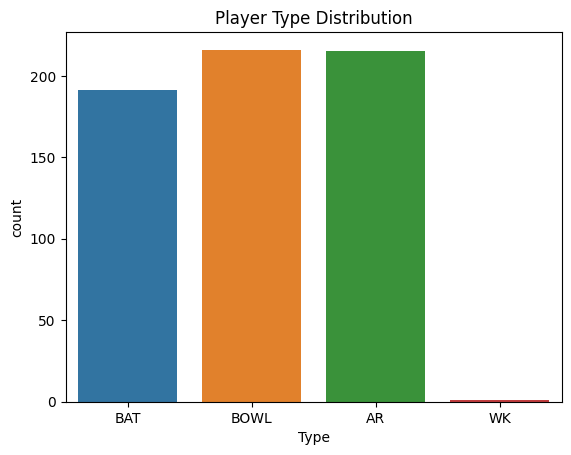

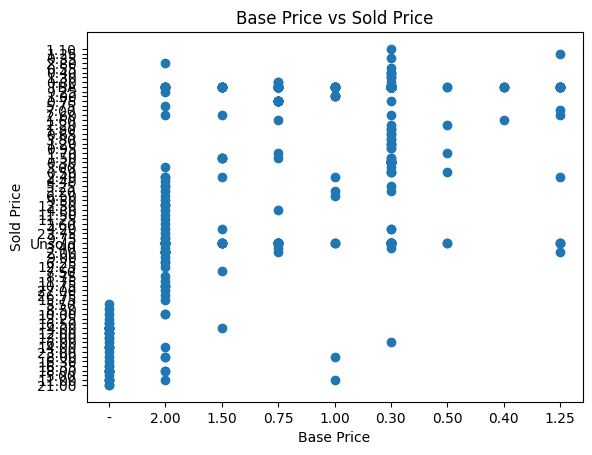

In [3]:
# Basic info and summary statistics
print(ipl_data.info())
print(ipl_data.describe())

# Visualize missing values
sns.heatmap(ipl_data.isnull(), cbar=False, cmap='viridis')
plt.title("Missing Values Heatmap")
plt.show()

# Player Type Distribution
sns.countplot(data=ipl_data, x='Type')
plt.title("Player Type Distribution")
plt.show()

# Base Price vs Sold Price
plt.scatter(ipl_data['Base'], ipl_data['Sold'])
plt.xlabel('Base Price')
plt.ylabel('Sold Price')
plt.title('Base Price vs Sold Price')
plt.show()


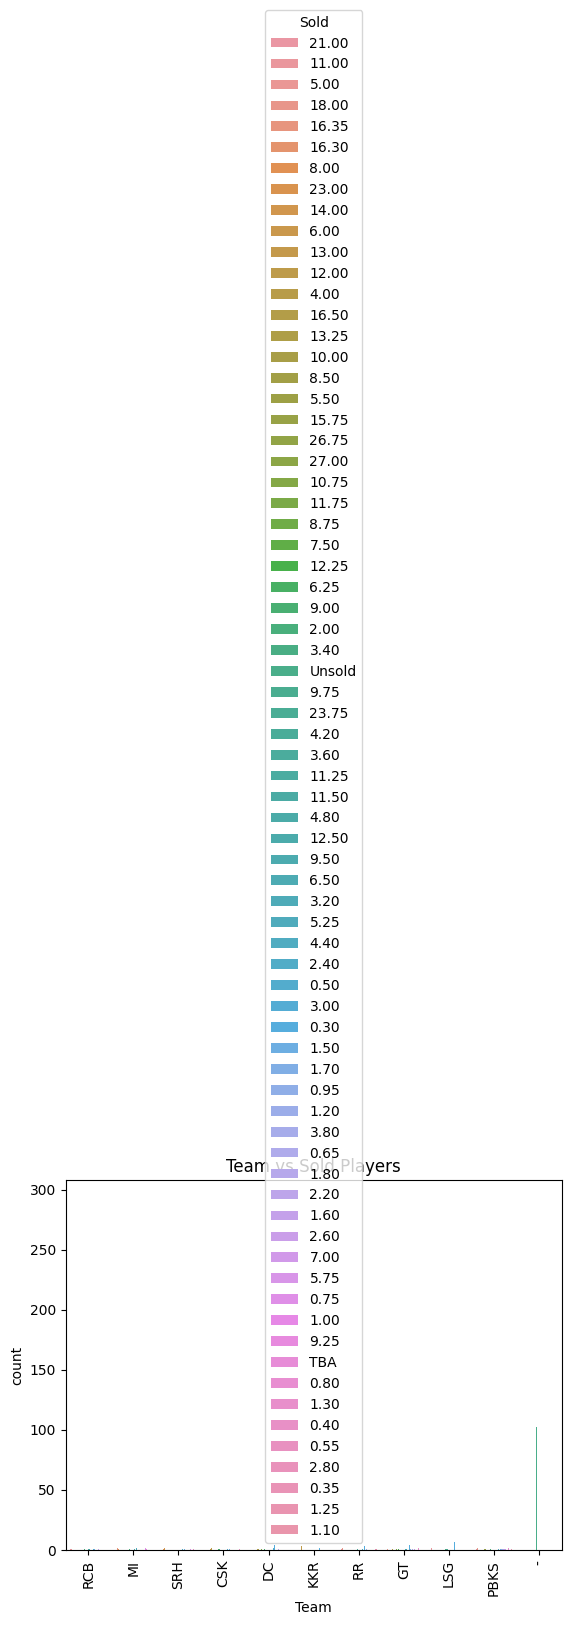

In [5]:
sns.countplot(data=ipl_data, x='Team', hue='Sold')
plt.xticks(rotation=90)
plt.title('Team vs Sold Players')
plt.show()


# Data Preprocessing

In [15]:
# Handle missing values
ipl_data['Base'] = ipl_data['Base'].fillna(0)
ipl_data['Sold'] = ipl_data['Sold'].replace(['TBA', 'Unsold'], 0).astype(float)

# Label Encoding for categorical variables
encoder = LabelEncoder()
ipl_data['Team'] = encoder.fit_transform(ipl_data['Team'])
ipl_data['Type'] = encoder.fit_transform(ipl_data['Type'])

# Feature Selection
features = ['Base', 'Team', 'Type']
target = 'Sold'

X = ipl_data[features]
y = ipl_data[target]


In [16]:
ipl_data = ipl_data.drop(columns=['Players'], errors='ignore')


In [17]:
ipl_data

,Team,Type,Base,Sold
0,8,1,-,21.00
1,8,1,-,11.00
2,8,2,-,5.00
3,6,2,-,18.00
4,6,1,-,16.35
...,...,...,...,...
618,0,0,0.30,0.00
619,9,2,2.00,12.50
620,0,2,0.30,0.00
621,0,3,0.30,0.00


In [24]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler




print("Original DataFrame:")
print(ipl_data)

# Step 1: Handle missing/invalid values in 'Base' column
# Replace '-' with 0.0 and convert the column to float
ipl_data['Base'] = ipl_data['Base'].replace('-', '0.0').astype(float)

# Step 2: Normalize/Scale numeric columns
scaler = MinMaxScaler()
numeric_columns = ['Team', 'Type', 'Base', 'Sold']
ipl_data[numeric_columns] = scaler.fit_transform(ipl_data[numeric_columns])



print("\nTransformed DataFrame:")
print(ipl_data)


Original DataFrame:
     Team  Type  Base   Sold
0       8     1     -  21.00
1       8     1     -  11.00
2       8     2     -   5.00
3       6     2     -  18.00
4       6     1     -  16.35
..    ...   ...   ...    ...
618     0     0  0.30   0.00
619     9     2  2.00  12.50
620     0     2  0.30   0.00
621     0     3  0.30   0.00
622     0     0  2.00   0.00

[623 rows x 4 columns]

Transformed DataFrame:
     Team      Type  Base      Sold
0     0.8  0.333333  0.00  0.777778
1     0.8  0.333333  0.00  0.407407
2     0.8  0.666667  0.00  0.185185
3     0.6  0.666667  0.00  0.666667
4     0.6  0.333333  0.00  0.605556
..    ...       ...   ...       ...
618   0.0  0.000000  0.15  0.000000
619   0.9  0.666667  1.00  0.462963
620   0.0  0.666667  0.15  0.000000
621   0.0  1.000000  0.15  0.000000
622   0.0  0.000000  1.00  0.000000

[623 rows x 4 columns]


In [27]:
ipl_data

,Team,Type,Base,Sold
0,0.8,0.333333,0.00,0.777778
1,0.8,0.333333,0.00,0.407407
2,0.8,0.666667,0.00,0.185185
3,0.6,0.666667,0.00,0.666667
4,0.6,0.333333,0.00,0.605556
...,...,...,...,...
618,0.0,0.000000,0.15,0.000000
619,0.9,0.666667,1.00,0.462963
620,0.0,0.666667,0.15,0.000000
621,0.0,1.000000,0.15,0.000000


In [21]:
ipl_data.isnull().sum()

Team    0
Type    0
Base    0
Sold    0
dtype: int64

# Train Test Split

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


#  Build Machine Learning Models

RMSE: 0.08927010368261684


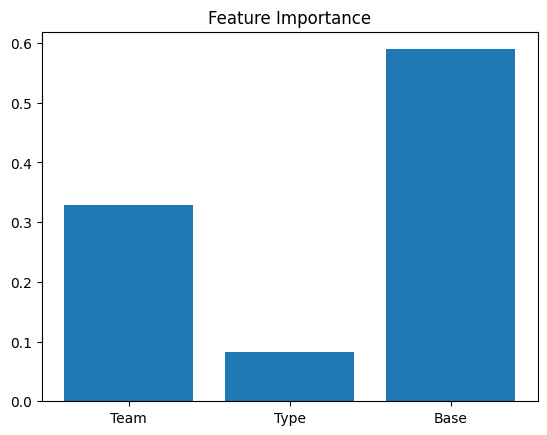

In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler



# Step 1: Preprocess data
ipl_data['Base'] = ipl_data['Base'].replace('-', '0.0').astype(float)

# Normalize/Scale the numeric columns
scaler = MinMaxScaler()
numeric_columns = ['Team', 'Type', 'Base', 'Sold']
ipl_data[numeric_columns] = scaler.fit_transform(ipl_data[numeric_columns])

# Step 2: Define Features (X) and Target (y)
X = ipl_data.drop(columns=['Sold'])  # All columns except 'Sold' are features
y = ipl_data['Sold']  # 'Sold' is the target variable

# Step 3: Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 4: Train Random Forest Regressor
model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)

# Step 5: Predict and evaluate
y_pred = model.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"RMSE: {rmse}")

# Step 6: Feature Importance
importances = model.feature_importances_
features = X.columns
plt.bar(features, importances)
plt.title("Feature Importance")
plt.show()


# Classification Model (Predicting Player Team)

In [32]:
# Prepare data for classification (e.g., binary sold/unsold classification)
ipl_data['Sold_Status'] = np.where(ipl_data['Sold'] > 0, 1, 0)
X_class = ipl_data[features]
y_class = ipl_data['Sold_Status']

X_train_class, X_test_class, y_train_class, y_test_class = train_test_split(X_class, y_class, test_size=0.2, random_state=42)

# Train a classification model
from sklearn.ensemble import GradientBoostingClassifier
clf = GradientBoostingClassifier(random_state=42)
clf.fit(X_train_class, y_train_class)

# Predictions and evaluation
y_pred_class = clf.predict(X_test_class)
print(classification_report(y_test_class, y_pred_class))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00        74
           1       1.00      1.00      1.00        51

    accuracy                           1.00       125
   macro avg       1.00      1.00      1.00       125
weighted avg       1.00      1.00      1.00       125



# Visualizations

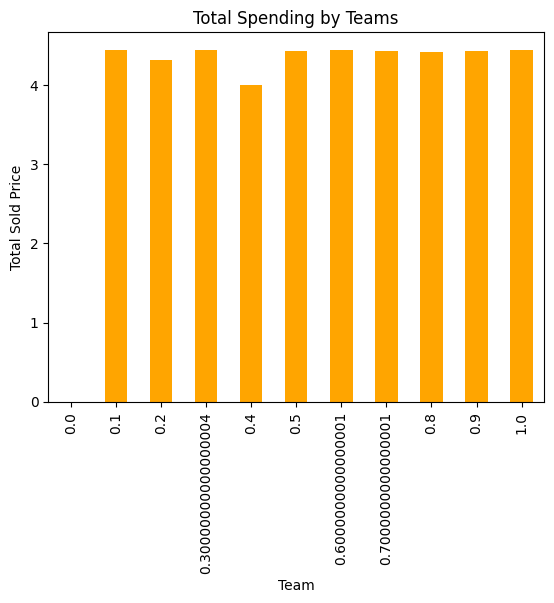

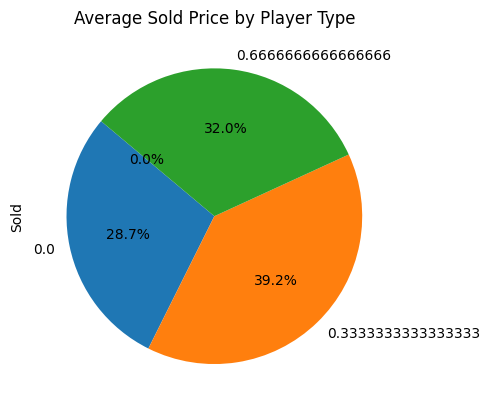

In [33]:
# Team-wise Spending
team_spending = ipl_data.groupby('Team')['Sold'].sum()
team_spending.plot(kind='bar', color='orange')
plt.title("Total Spending by Teams")
plt.ylabel("Total Sold Price")
plt.show()

# Player Type vs Average Sold Price
avg_price_by_type = ipl_data.groupby('Type')['Sold'].mean()
avg_price_by_type.plot(kind='pie', autopct='%1.1f%%', startangle=140)
plt.title("Average Sold Price by Player Type")
plt.show()


#  Hyperparameter Tuning

In [34]:
# Grid Search for Random Forest
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10]
}

grid_search = GridSearchCV(estimator=RandomForestRegressor(random_state=42), param_grid=param_grid, cv=3, scoring='neg_mean_squared_error', verbose=2)
grid_search.fit(X_train, y_train)

# Best Parameters
print(f"Best Parameters: {grid_search.best_params_}")


Fitting 3 folds for each of 27 candidates, totalling 81 fits
[CV] END max_depth=None, min_samples_split=2, n_estimators=50; total time=   0.1s
[CV] END max_depth=None, min_samples_split=2, n_estimators=50; total time=   0.1s
[CV] END max_depth=None, min_samples_split=2, n_estimators=50; total time=   0.1s
[CV] END max_depth=None, min_samples_split=2, n_estimators=100; total time=   0.1s
[CV] END max_depth=None, min_samples_split=2, n_estimators=100; total time=   0.1s
[CV] END max_depth=None, min_samples_split=2, n_estimators=100; total time=   0.1s
[CV] END max_depth=None, min_samples_split=2, n_estimators=200; total time=   0.2s
[CV] END max_depth=None, min_samples_split=2, n_estimators=200; total time=   0.2s
[CV] END max_depth=None, min_samples_split=2, n_estimators=200; total time=   0.2s
[CV] END max_depth=None, min_samples_split=5, n_estimators=50; total time=   0.1s
[CV] END max_depth=None, min_samples_split=5, n_estimators=50; total time=   0.1s
[CV] END max_depth=None, min_sa

# Save and Share the Results

In [35]:
# Save the processed dataset
ipl_data.to_csv("processed_ipl_auction_2025.csv", index=False)

# Save models
import joblib
joblib.dump(model, "sold_price_model.pkl")
joblib.dump(clf, "team_prediction_model.pkl")


['team_prediction_model.pkl']

# Would you like additional customization or visualization techniques? 🚀


# If you like my notebook please upvote.